# Gillespie Exploratory Data Analysis - 10+ Years of Quantified Self Data

title: 10+ Years of Quantified Self Data
author: Aaron Gillespie
date: 2025-02-16 and thereabouts
purpose: This Jupyter notebook (will) introduce and explore data pulled from my long-running personal quantified self project - aka my "Data Journal". I'd like to explore my personal dataset as a means to do some self-directed work with Python & Jupyter Notebooks. In terms of what I hope to stories I hope to achieve with the analysis - I hope to tell the story that having a "life in a spreadsheet" is both easy and worthwhile.

## Background - The Data Journal
Data Journal is a system I built to help me keep track of stuff that happens in my life. Its form has changed greatly over the past decade, but its function has remained the same: to house data about things I do. It’s a default place to make note of things that might not otherwise have a place. I’ve tracked lots of different things over the years.

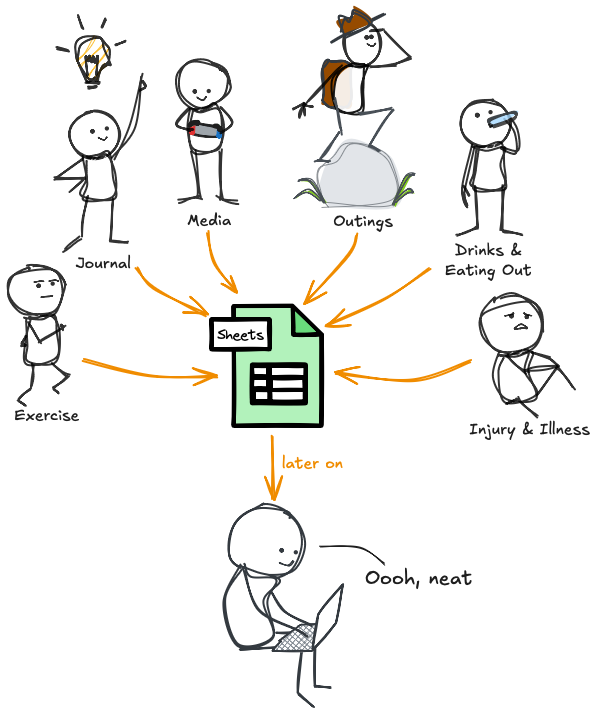

My Data Journal allows me to answer questions like:

- “When did this pain in my back start?”
- “How many workouts have I done this year?”
- “When was the last time I hung out with this person?”
- “How many drinks have I had the past few weeks?”
- “Have I eaten out more or exercised more this month?”
- “Have I met this goal I set for myself?” 

### What I'm Tracking Now

This list has been honed over time. I've tracked everything on this list since at January 1st 2020, and several things dating way way before that (dating back to 2013). I track these things because they've proven themselves either useful or amusing enough to continue being noted.

- **Workouts**
	- `Name` - title of workout or short description
	- `Type` - one of strength/cardio/mobility
	- `Note` - comment field, usually about how the workout went
- **Pains**
	- `Pains` - comma separated list of symptoms
	- `Treatments` - comma separated list of medicines/therapies
	- `Note` - what happened, or general place to complain
- **Media**
	- `Type` - one of book/movie/TV/Videogame
	- `Title` - of the piece of media
	- `First Time` - yes or no, is this my first time with this piece of media?
- **Outings**
	- `Type` - comma separated list of various tags, e.g. eating out, seeing friends, etc
	- `Where` - name of place visited
	- `Note` - usually how it went or why we're there
- **Quotes**
	- `Quote` - what was said
	- `Quoter` - who said it
	- `Note` - any additional context
- **Events**
	- `Event` - a catch-all for any time-based thing I want to make note of - e.g. "replaced hot water heater"
- **Daily Things**
	- `Summary` - A brief description of the day. What I did. Who I saw. How it went.
	- `Health` - 1-to-10 how healthy do I feel?
	- `Satisfaction`  - 1-to-10 how satisfied am I with the day?
	- `Bedtime` - time of night falling asleep
	- `Wake` - time of morning waking
	- `Sleep Duration` - duration between the above
	- `Sleep Location` - city & state I'm located at at 3:30 AM
	- `Work Status` - one of Weekend/At Work/WFH/Holiday/Sick/Vacation
- **Weekly**
	- Formulas summarizing all of the above
- **Monthly**
	- Formulas summarizing all of the above
- **Quarterly**
	- Formulas summarizing all of the above
- **Yearly**
	- Formulas summarizing all of the above
	- `Big Event` - it seems like every year has one, they mark the passage of time
	- `Podcast Listen Time` - Hours 
	- `YouTube View Count` - per Google Takeout
	- `Puzzle Box` - name of my annual puzzle box

Looks like a lot, and it probably is, but I've made capture very easy. All of the sleep-related stuff happens automatically. Everything else is primarily entered in an ad-hoc manner via Siri Shortcuts.

> [!NOTE]  
> The data included in this Git Repository are a subset of the data above. For more information on the Data Journal, including how I built and operate it, see [my personal site](https://aarongilly.com/Pages/Data-Journal#how-to).

## Imports

Creating references to libraries I'll be utilizing.

In [244]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# For the word cloud
from wordcloud import WordCloud

## Load Data - Daily

Loading data from `Data Journal 11 - Days`, which contains one row per day for the past 4300 days.

In [245]:
# Load CSV to DataFrame
df = pd.read_csv('source_data/Data Journal 11 - Days.csv')

# Initial Data Exploration - shaping
print(df.head(10))
print(df.shape)
print(df.dtypes)

      Date Wk Day   Day      Week    Month  Quarter  Year  Week Int  \
0  2/15/25    Sat  4317  2025-W07  2025-02  2025-Q1  2025         7   
1  2/14/25    Fri  4316  2025-W07  2025-02  2025-Q1  2025         7   
2  2/13/25   Thur  4315  2025-W07  2025-02  2025-Q1  2025         7   
3  2/12/25    Wed  4314  2025-W07  2025-02  2025-Q1  2025         7   
4  2/11/25    Tue  4313  2025-W07  2025-02  2025-Q1  2025         7   
5  2/10/25    Mon  4312  2025-W07  2025-02  2025-Q1  2025         7   
6   2/9/25    Sun  4311  2025-W06  2025-02  2025-Q1  2025         6   
7   2/8/25    Sat  4310  2025-W06  2025-02  2025-Q1  2025         6   
8   2/7/25    Fri  4309  2025-W06  2025-02  2025-Q1  2025         6   
9   2/6/25   Thur  4308  2025-W06  2025-02  2025-Q1  2025         6   

   Month Int  Version  ...  Journal  Satisfaction  Health  Work Status  \
0          2       11  ...      NaN           8.0     9.0          NaN   
1          2       11  ...      NaN           7.0     8.0          NaN

### Transformations

Doing some basic manipulations to make the data easier to work with:

- Deletion - the dataset includes several columns which were sanitized for publication. These columns do not need to exist and add clutter.
- Renaming - several columns could have more descriptive headers
- Addition - some rows contain blank values for days where I failed to track things, these could be more explicitly called out via a new column

In [246]:
# Data Cleaning 
# Removing sanitized columns & helper columns
df = df.drop(['Week Int', 'Month', 'Quarter', 'Year', 'Month Int', 'Version', 'Journal', 'Location', 'Work Status', 'Photos', 'Calendar', 'Quotes', 'Events'], axis=1)

# Renaming columns
df = df.rename(columns={'Satisfaction': 'Satisfaction (out of 10)', 'Health': 'Health (out of 10)', 'Sleep Duration': 'Sleep Duration (hrs)', 'Weight': 'Weight (lbs)'})

# Data Cleaning - Handling missing values
df['Missing'] = df['Satisfaction (out of 10)'].isna()

# Checking dataframe post cleaning
print(df.head(10))
print(df.shape)
print(df.dtypes)

      Date Wk Day   Day      Week  Satisfaction (out of 10)  \
0  2/15/25    Sat  4317  2025-W07                       8.0   
1  2/14/25    Fri  4316  2025-W07                       7.0   
2  2/13/25   Thur  4315  2025-W07                       6.0   
3  2/12/25    Wed  4314  2025-W07                       6.0   
4  2/11/25    Tue  4313  2025-W07                       4.0   
5  2/10/25    Mon  4312  2025-W07                       7.0   
6   2/9/25    Sun  4311  2025-W06                       5.0   
7   2/8/25    Sat  4310  2025-W06                       4.0   
8   2/7/25    Fri  4309  2025-W06                       2.0   
9   2/6/25   Thur  4308  2025-W06                       2.0   

   Health (out of 10)      Bedtime        Wake  Sleep Duration (hrs)  \
0                 9.0  12:09:02 AM  8:05:03 AM                  7.93   
1                 8.0  12:39:00 AM  7:45:00 AM                  7.10   
2                 7.0  11:26:00 PM  7:36:00 AM                  8.17   
3                 

## Initial Descriptive Statistics

Using the DataFrame describe() method to display summary statistics for each Numerical column.

In [247]:
# Utilizing the built-in "describe()" method
print(df[['Satisfaction (out of 10)','Health (out of 10)', 'Sleep Duration (hrs)', 'Weight (lbs)']].describe())

       Satisfaction (out of 10)  Health (out of 10)  Sleep Duration (hrs)  \
count               2635.000000         2632.000000           3102.000000   
mean                   5.950285            8.852964              7.595364   
std                    1.775828            1.650138              1.331137   
min                    1.000000            1.000000              1.620000   
25%                    5.000000            8.000000              6.850000   
50%                    6.000000           10.000000              7.580000   
75%                    7.000000           10.000000              8.330000   
max                   10.000000           10.000000             18.680000   

       Weight (lbs)  
count    527.000000  
mean     228.597913  
std        3.801903  
min      214.000000  
25%      227.000000  
50%      229.000000  
75%      231.000000  
max      238.000000  


### Descriptive Statistical Observations

#### Deltas in Count

The `count` of each of my 3 numerical columns reveals a fact I forgot - I didn't start tracking subjective daily "satisfaction" and "health" metrics until version 4 of my Data Journal. This is why there are only 2600 results for each of those where the source data has 4300 rows. The "Journal" column, which I've redacted for the sake of privacy for my family and friends, would have included values in nearly all of the 4300 rows.

#### Differences between Satisfaction & Health

My average "Satisfaction" rating is 5.95 out of 10, whereas my average "Health" rating is 8.85. This goes to show that I'm typically pretty healthy, and that I'm, on average, more satisfied than not with how life is going. You may infer there's room for improvement with life satisfaction (and, to be honest, there always is), however I've come to realize [Hedonic Adaptation](https://en.wikipedia.org/wiki/Hedonic_treadmill) is a thing and that it's difficult to *actually* move happiness/satisfaction far from your hedonic set point.

#### Sleep Duration

I'm particularly pleased with my sleep duration. Depsite a bedtime & waketime that DO waffle around more than I'd like, the middle 50% of my sleep duration metrics fall within a very healthy range of 6.85 hours per night to 8.33 hours per night, with the average sitting at 7.59 hours. This is over 3102 tracked sleeps - which span the birth and rearing of two children. 

#### Weight

I'm heavier than most people, but I'm also taller than essentially *everyone*, so that's not something I'm surprised by or disappointed with. In fact I'm quite happy with a standard deviation of only 3.8 pounds over 527 measurements dating from 2014 to 2025. This would mean that (assuming normal distribution (bad assumption)) 95% of my weigh-ins would fall within the same 15.2 lb span.

## Data Distribution for Numerical Columns

Utilizing Seaborn for data visualization - histograms for each daily subjective rating.

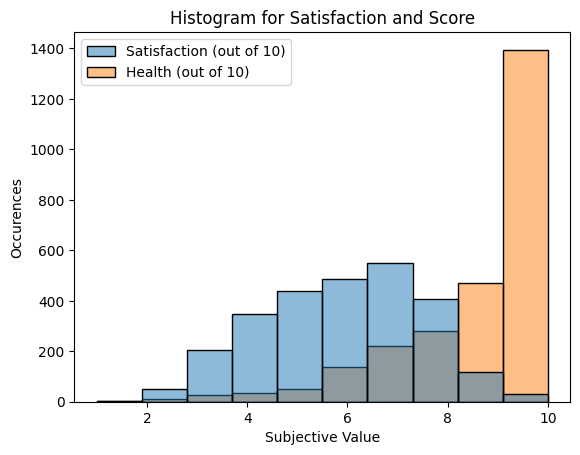

In [248]:
# Plotting using seaborn (multiple columns)
sns.histplot(df[['Satisfaction (out of 10)', 'Health (out of 10)']], bins=10, kde=False)

# Adding labels and title
plt.xlabel('Subjective Value')
plt.ylabel('Occurences')
plt.title('Histogram for Satisfaction and Score')

# Show the plot
plt.show()

### Data Distribution Observations

The data distribution add new insights on top of the basic descriptive statistics, but also more or less affirm what you might have assumed.

- **Health** - thankfully health follows an ever-increasing trend. The most common value of my subjective health rating, by far, is 10. Each "health point" dropped shows an equivalent drop in frequency.
- **Satisfaction** - satisfaction shows something more or less approaching a [left-skewed](https://en.wikipedia.org/wiki/Skewness) curve. I try to reserve the extremes (10s and 1s) for truly exceptional days. One thing that pops out in the histogram is that my most frequent satisfaction score is actually a 7/10, despite "7" not showing up in the descriptive statistics above.

## Data Distribution for a Categorical Column

My first dataset had all the potential categorical columns scrubbed out of it. Luckily, I did add one back in - whether or not the `Satisfaction` was tracked.

I have a more substantial *categorical* example on a later dataset.

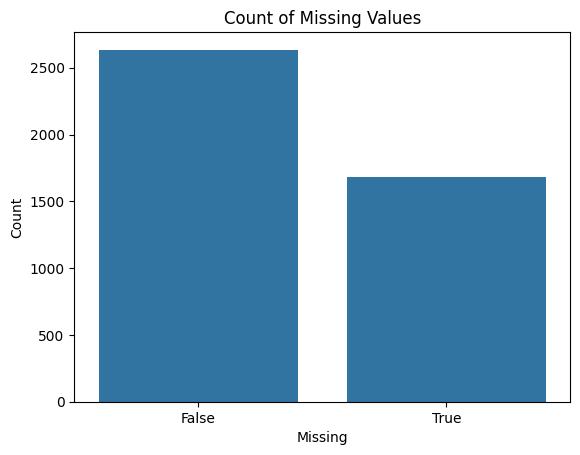

In [249]:
# Create a countplot for the "Missing" column
sns.countplot(x='Missing', data=df)

# Adding labels and title
plt.xlabel('Missing')
plt.ylabel('Count')
plt.title('Count of Missing Values')

# Show the plot
plt.show()

## Plotting Sleep over Time

See if you can figure out where I had children. You can probably guess where my first child happened. My 2nd child, for whatever reason, did not actually make a blip in my **tracked** sleep. It sure felt like it at the time, though.

Here I'm adding a 30-day rolling average to make the trend stick out more from the noise.

/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_60526/197531884.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


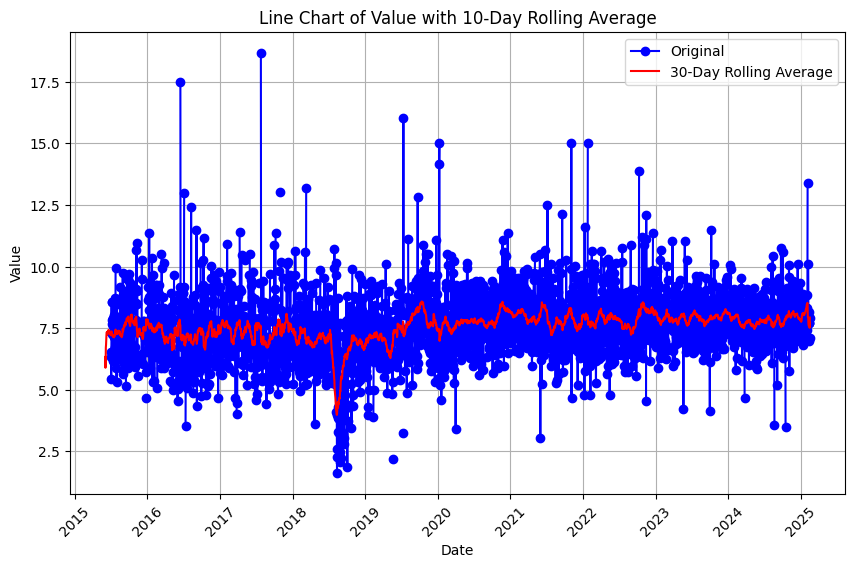

In [250]:
# Step 1: Convert the 'Date' column to datetime (if it's not already)
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Calculate the 10-day rolling average
df['Rolling_Avg'] = df['Sleep Duration (hrs)'].rolling(window=30, min_periods=1).mean()

# Step 3: Plot the data (raw values and rolling average)
plt.figure(figsize=(10, 6))

# Plotting the original values
plt.plot(df['Date'], df['Sleep Duration (hrs)'], marker='o', linestyle='-', color='b', label='Original')

# Plotting the 10-day rolling average
plt.plot(df['Date'], df['Rolling_Avg'], linestyle='-', color='r', label='30-Day Rolling Average')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Chart of Value with 10-Day Rolling Average')

# Rotate date labels for better visibility
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Load Data - Media

Since 2019 I've tracked movies, TV shows, books, and videogames I've consumed. These data are *not* subject to the "one-row-per-day" format, and instead captured as one row **per occurance of media consumption**. This is a much more natural way to track things that may happen on frequency scales ranging from less-than-hourly to greater-than-weekly.

In [251]:
# Load CSV to DataFrame
media_df = pd.read_csv('source_data/Data Journal 11 - MEDIA.csv')

# Initial Data Exploration - shaping
print(media_df.head(10))
print(media_df.shape)
print(media_df.dtypes)

        Date      Week    Month  Quarter  Year           Timestamp Media Type  \
0  2/14/2025  2025-W07  2025-02  2025-Q1  2025  2/14/2025 23:49:06         TV   
1  2/14/2025  2025-W07  2025-02  2025-Q1  2025  2/14/2025 20:59:34      Movie   
2  2/13/2025  2025-W07  2025-02  2025-Q1  2025  2/13/2025 10:59:30         TV   
3  2/13/2025  2025-W07  2025-02  2025-Q1  2025  2/13/2025 10:58:48         TV   
4  2/12/2025  2025-W07  2025-02  2025-Q1  2025  2/12/2025 22:06:52         TV   
5   2/6/2025  2025-W06  2025-02  2025-Q1  2025   2/6/2025 18:15:45         TV   
6   2/6/2025  2025-W06  2025-02  2025-Q1  2025   2/6/2025 14:16:19         TV   
7   2/5/2025  2025-W06  2025-02  2025-Q1  2025    2/5/2025 9:46:20         TV   
8   2/4/2025  2025-W06  2025-02  2025-Q1  2025   2/4/2025 14:16:33       Book   
9   2/3/2025  2025-W06  2025-02  2025-Q1  2025   2/3/2025 21:38:15  Videogame   

                             Media Title First Time  Media Note  
0                              Severance  

## Cleaning

Similar to the `Days` dataset, there are helper columns and columns I've scrubbed out of existence. I'll clean those up here to reduce the data to be worked with.

In [252]:
# Data Cleaning 
# Removing sanitized columns & helper columns
media_df = media_df.drop(['Week', 'Month', 'Quarter', 'Year', 'Media Note'], axis=1)

# Checking dataframe post cleaning
print(media_df.head(10))
print(media_df.shape)
print(media_df.dtypes)

        Date           Timestamp Media Type  \
0  2/14/2025  2/14/2025 23:49:06         TV   
1  2/14/2025  2/14/2025 20:59:34      Movie   
2  2/13/2025  2/13/2025 10:59:30         TV   
3  2/13/2025  2/13/2025 10:58:48         TV   
4  2/12/2025  2/12/2025 22:06:52         TV   
5   2/6/2025   2/6/2025 18:15:45         TV   
6   2/6/2025   2/6/2025 14:16:19         TV   
7   2/5/2025    2/5/2025 9:46:20         TV   
8   2/4/2025   2/4/2025 14:16:33       Book   
9   2/3/2025   2/3/2025 21:38:15  Videogame   

                             Media Title First Time  
0                              Severance        NaN  
1        Captain America Brave New World       True  
2                             Invincible        NaN  
3  Your Friendly Neighborhood Spider Man        NaN  
4  Your Friendly Neighborhood Spider Man        NaN  
5                             Invincible        NaN  
6                        The White Lotus       True  
7  Your Friendly Neighborhood Spider Man       Tru

### Cleaning - Creating 4 Frames from One

"Media" is a broad brush to paint with. It might be more interesting to look at the titles grouped by the *type* of media they represent. This could be accomplished by breaking the large dataframe containing all media into 4 filtered copies.

In [253]:
# Create separate DataFrames based on Media Type
df_book = media_df[media_df['Media Type'] == 'Book']
df_movie = media_df[media_df['Media Type'] == 'Movie']
df_tv = media_df[media_df['Media Type'] == 'TV']
df_videogame = media_df[media_df['Media Type'] == 'Videogame']

From here additional analysis could be done on the titles of each type of media. I actually don't care to do thi for every type, but wanted to demonstrate turning one "large" DataFrame into multiple filtered copies. Here's another visualization that's easy to make with Python and its libraries that is quite difficult without it - a **word cloud** of the most common words represented in my Movies dataframe:

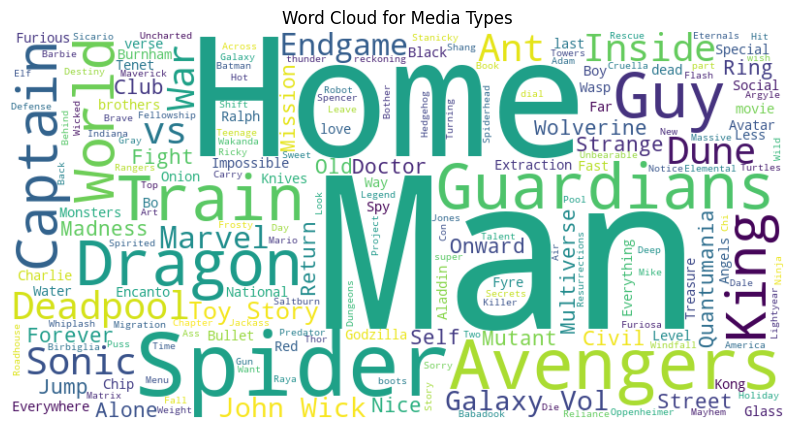

In [254]:
# Step 1: Create a text string from the 'Media Type' column (space-separated)
text = ' '.join(df_movie['Media Title'])

# Step 2: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Step 3: Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud for Media Types')
plt.show()

#### Wordcloud Observation

I like super hero stuff. Also too many movies are about "Man" and "Guy". 

## Categorical Analysis

I am interested in seeing the relative amounts of each type of media. This doesn't depend on `Timestamp` or `Media Title`, so I'll drop those columns and run a loop over the remaining categorical columns.

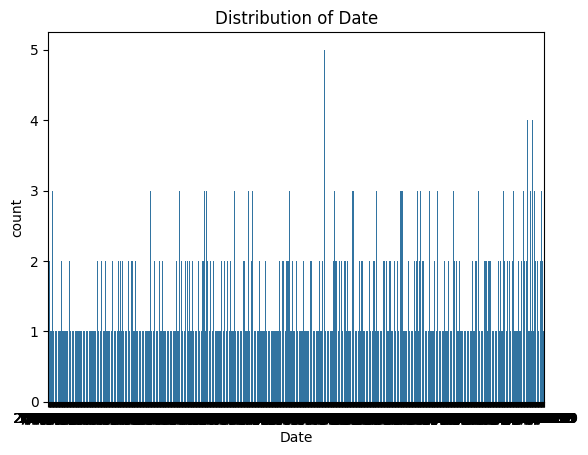

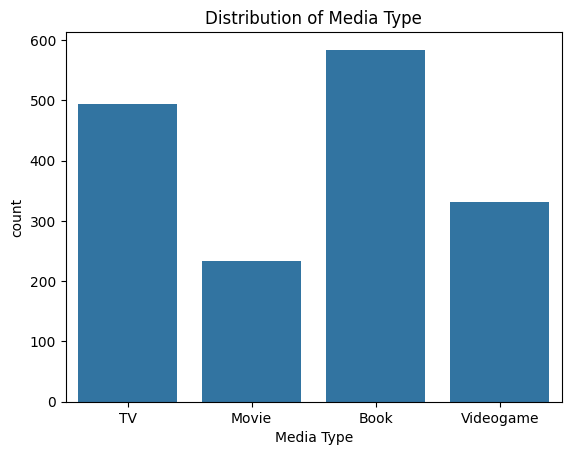

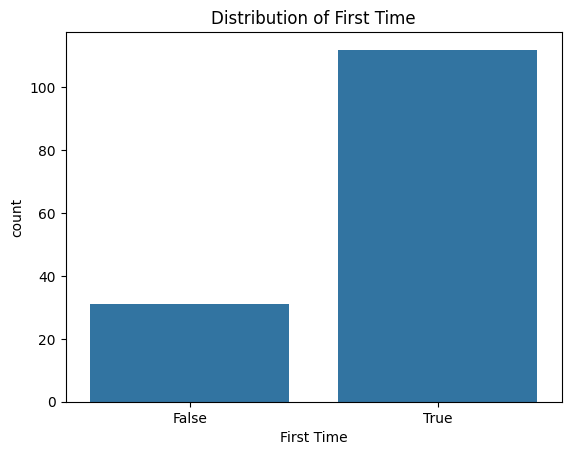

In [255]:

# Removing sanitized columns & helper columns
media_df = media_df.drop(['Timestamp', 'Media Title'], axis=1)

# Inspect value counts for all categorical columns
for col in media_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=media_df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### Observations

This shows that I read more than watch anything, I watch TV more than I play games, but I play games more often than I watch movies. As a guy with a movie podcast, this is a somewhat depressing result.

ALSO the "First Time" column shows that I typically don't track "first time" as *false*. I'll just leave it blank if it's not true. This is an opportunity to do some data cleaning.

/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_60526/1103740158.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  media_df['First Time'] = media_df['First Time'].fillna(False)


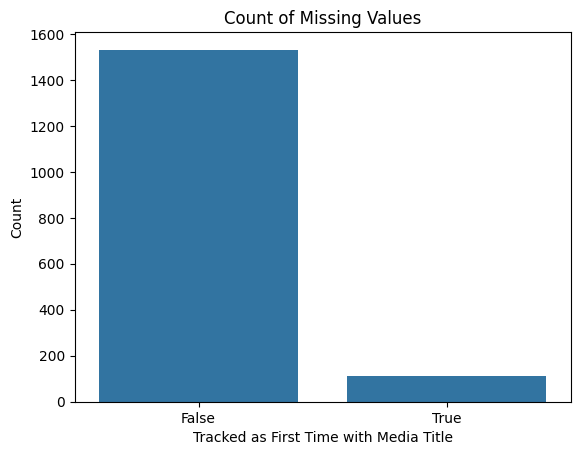

In [256]:
# Replace blank (NaN) values in 'First Time' with False
media_df['First Time'] = media_df['First Time'].fillna(False)

# Create a countplot for the "First Time" column
sns.countplot(x='First Time', data=media_df)

# Adding labels and title
plt.xlabel('Tracked as First Time with Media Title')
plt.ylabel('Count')
plt.title('Count of Missing Values')

# Show the plot
plt.show()

I believe, however, that this **also** doesnt' represent reality. The truth is "first time" hasn't always existed, and has always been a bit "Squishy" in use. So perhaps there's not enough data validity to warrant further analysis on this one.

# Load Data - Workouts

The 3rd and final dataset I'll analyze - my tracked workouts over the past 12 years. I bucket workouts as one of 4 different type of workoutss, holistically.

1. Strength
2. Cardio
3. Mobility
4. Unknown - primarily used as a placeholder before I started categorizing workouts

In this case, I'll keep the helper columns from the original dataset, as having them there doesnt seem to hurt anything.

In [257]:
# Load CSV to DataFrame
workout_df = pd.read_csv('source_data/Data Journal 11 - WORKOUTS.csv')

# Initial Data Exploration - shaping
print(workout_df.head(10))
print(workout_df.shape)
print(workout_df.dtypes)

      Date      Week    Month  Quarter  Year      Timestamp Workout Type  \
0  2/14/25  2025-W07  2025-02  2025-Q1  2025  2/14/25 15:25     Strength   
1   2/1/25  2025-W05  2025-02  2025-Q1  2025   2/1/25 22:37     Mobility   
2  1/31/25  2025-W05  2025-01  2025-Q1  2025  1/31/25 17:27     Strength   
3  1/29/25  2025-W05  2025-01  2025-Q1  2025  1/29/25 20:12     Mobility   
4  1/28/25  2025-W05  2025-01  2025-Q1  2025  1/28/25 19:33     Strength   
5  1/26/25  2025-W04  2025-01  2025-Q1  2025  1/26/25 18:12     Strength   
6  1/24/25  2025-W04  2025-01  2025-Q1  2025  1/24/25 18:38     Strength   
7  1/23/25  2025-W04  2025-01  2025-Q1  2025  1/23/25 20:54     Strength   
8  1/22/25  2025-W04  2025-01  2025-Q1  2025  1/22/25 23:16     Mobility   
9  1/21/25  2025-W04  2025-01  2025-Q1  2025  1/21/25 21:04     Strength   

                Workout Name  
0                Full Body 1  
1                       Yoga  
2            Iron Block Legs  
3                       Yoga  
4       

## Analysis - Workouts by Type per Year

This is the barchart I like to review at the end of the year each year. It plots the total number of tracked workouts per year as a *stacked bar chart* where each bar segment corresponds to the *workout type*. This shows total volume of exercise over time, but also a feel for the relative proportions of its makeup.

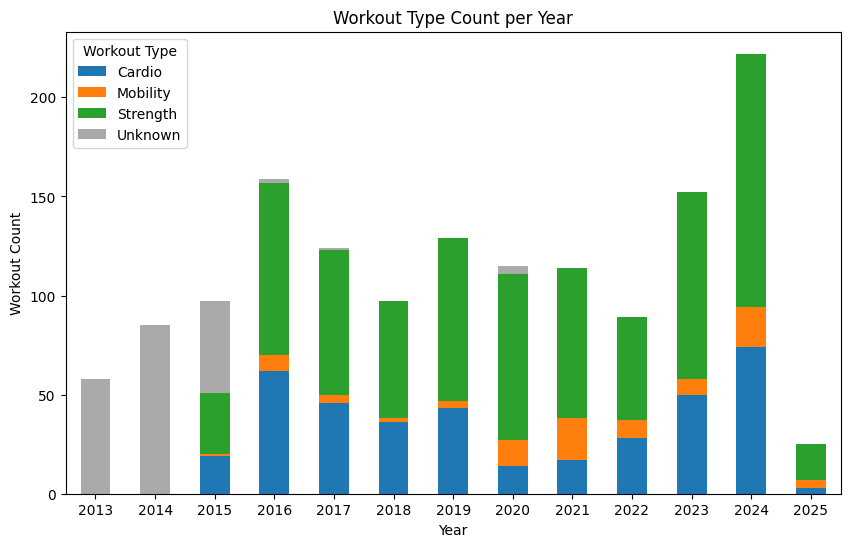

In [258]:
# Step 1: Group by 'Year' and 'Workout Type' to count the occurrences
workout_counts = workout_df.groupby(['Year', 'Workout Type']).size().unstack(fill_value=0)

# Step 2: Plot the stacked bar chart
workout_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#aaaaaa'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Workout Count')
plt.title('Workout Type Count per Year')
plt.xticks(rotation=0)
plt.legend(title='Workout Type')

# Show the plot
plt.show()

### Observations

Last year my wife and I started exercising together, rather than each doing our own thing. This lead to a corresponding *increase* (assuming [causation](https://xkcd.com/552/)) in overall workouts. It was also the year where I bought a treadmill, so I now have the ability to get cardio done indoors.

## Analysis - Workouts by Day of Week

This is another view that I've stumbled across that seems interesting. The relative proportion of each **day of the week** that I work out on, presented as a pie chart:

/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_60526/2195054174.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  workout_df['Date'] = pd.to_datetime(workout_df['Date'])


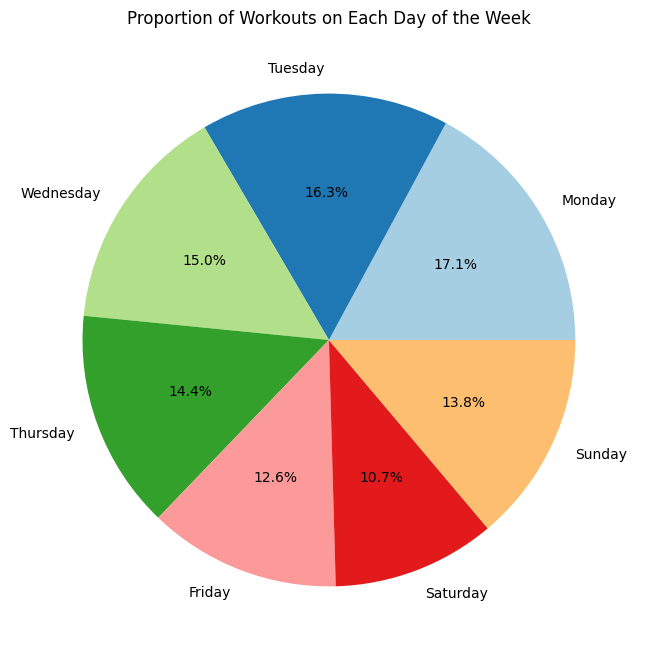

In [259]:
# Step 1: Convert the 'Date' column to datetime
workout_df['Date'] = pd.to_datetime(workout_df['Date'])

# Step 2: Extract the day of the week (0 = Monday, 6 = Sunday)
workout_df['Day of Week'] = workout_df['Date'].dt.weekday

# Step 3: Count occurrences for each day of the week
day_counts = workout_df['Day of Week'].value_counts().sort_index()

# Step 4: Map numbers to weekdays for the pie chart labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 5: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion of Workouts on Each Day of the Week')

# Show the plot
plt.show()

### Observation - Day of Week

As you'd expect, I workout less as the week goes on.There's almost a 1 percent decrease per day of week starting from Monday through Saturday, rebounding halfway back from Saturday to Sunday. I like this chart because it lines up with what I was expecting almost *exactly*. It's nice when data lines up with inuition.

# Grand Finale - Combining DataFrames

I now have 3 separate DataFrames - one for every day wherein I rated my subjective level of daily "Satisfaction", one for every *workout* I completed, and one for every time I engaged with media. Combining these should allow me to see how workouts and various types of media affect my satisfaction.

                          Satisfaction (out of 10)  Media Type Present  \
Satisfaction (out of 10)                  1.000000            0.028988   
Media Type Present                        0.028988            1.000000   
Workout Type Present                      0.130756            0.038088   

                          Workout Type Present  
Satisfaction (out of 10)              0.130756  
Media Type Present                    0.038088  
Workout Type Present                  1.000000  


/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_60526/3605801347.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Media Type Present', y='Satisfaction (out of 10)', data=df_combined, palette="Set2")


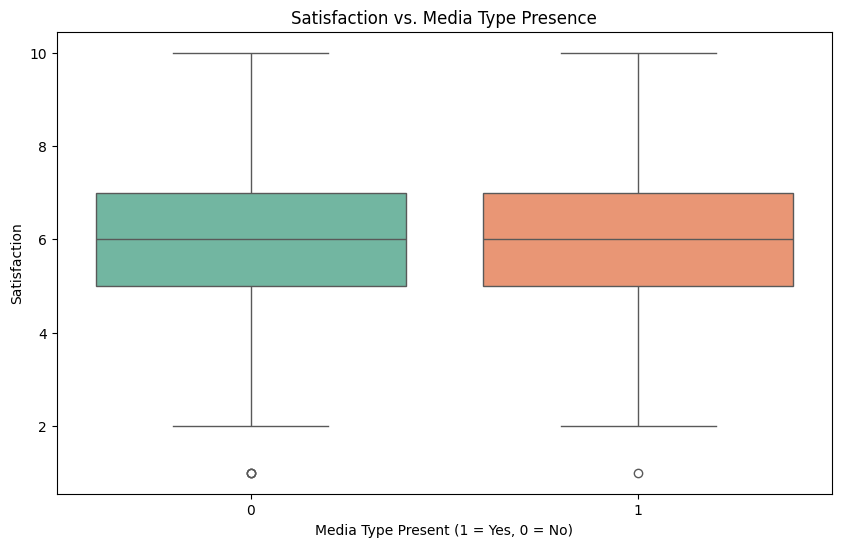

/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_60526/3605801347.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workout Type Present', y='Satisfaction (out of 10)', data=df_combined, palette="Set1")


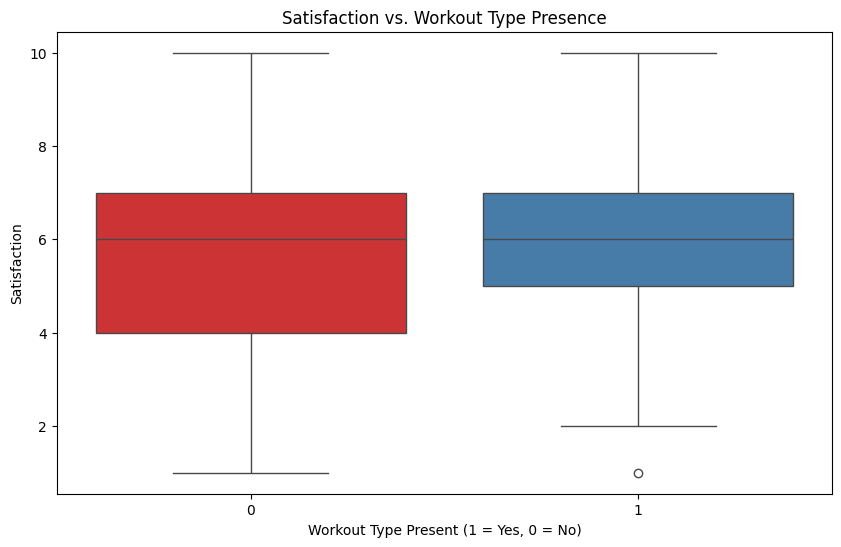

In [261]:
# Step 0: Date conversion for the Daily dataset - to match the other DataFrames
df['Date'] = pd.to_datetime(df['Date'])
media_df['Date'] = pd.to_datetime(media_df['Date'])
workout_df['Date'] = pd.to_datetime(workout_df['Date'])

# Step 1: Merge all dataframes on 'Date'
df_combined = df.merge(media_df, on='Date', how='left').merge(workout_df, on='Date', how='left')

# Step 2: Create binary columns for the presence of "Media Type" and "Workout Type"
df_combined['Media Type Present'] = df_combined['Media Type'].notna().astype(int)
df_combined['Workout Type Present'] = df_combined['Workout Type'].notna().astype(int)

# Step 3: Drop the 'Media Type' and 'Workout Type' columns, we just need the binary indicators
df_combined = df_combined[['Date', 'Satisfaction (out of 10)', 'Media Type Present', 'Workout Type Present']]

# Step 4: Correlation between Satisfaction and the presence of Media Type / Workout Type
correlations = df_combined[['Satisfaction (out of 10)', 'Media Type Present', 'Workout Type Present']].corr()

# Print the correlation matrix
print(correlations)

# Step 5: Plot the results

# Plot satisfaction vs. Media Type presence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Media Type Present', y='Satisfaction (out of 10)', data=df_combined, palette="Set2")
plt.title('Satisfaction vs. Media Type Presence')
plt.xlabel('Media Type Present (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction')
plt.show()

# Plot satisfaction vs. Workout Type presence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Workout Type Present', y='Satisfaction (out of 10)', data=df_combined, palette="Set1")
plt.title('Satisfaction vs. Workout Type Presence')
plt.xlabel('Workout Type Present (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction')
plt.show()


### Observation - The Effects of Working Out and Consuming Media on Self-assessed Subjective Daily Satisfaction

The correlation coefficients found show:
- **weak positive correlation** between the presence of a Work Out on a given day and its associated level of percevied satisfaction (Correlation coefficient = 0.13)
- **essentially no correlation** between Media Consumption and perceived daily satisfaction (correlation coefficient = 0.03)

#### Box & Whisker Plots

The box & whisker plots show the 100th, 75th, 50th, 25th, and 0th percentiles for a given measure.

The box & whisker plot showing daily perceived satisfacation both with Media Consumption present and without media consumption back up the complete lack of correlation found. The two box & whiskers shown (orange and green, on my screen) are effectively identical.

The box & whisker plot showing the positions of the percentiles for Satisfaction ratings on days containing Workouts and days NOT containing workouts, however, DO show the positive effect workouts have on "raising the floor" for satisfaction. The 0th and 25th percentiles both move up one "Satisfaction point" on days where I work out compared to days where I don't. So, workouts may not raise the your satisfaction ceiling, but they do help raise the floor. 